# 02.Entrenamiento del modelo


In [2]:
pip install tensorflow

     -------------------------------------- 375.9/375.9 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 135.6/135.6 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB ? eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 11.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 8.5 MB/s eta 0:00:00
     --------------------------------------- 12.9/12.9 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 10.5 MB/s eta 0:00:00
     ------------------------------------- 209.7/209.7 kB 13.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.5 MB/s eta 0:00:00
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
     --


[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install spacy nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!python -m spacy download es_core_news_sm


     --------------------------------------- 12.9/12.9 MB 10.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')



[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import sqlite3
import datetime
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANTI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANTI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importacion de la Data

In [7]:


# Guardar en un dataframe
def save_to_dataframe(db_path, table_name):
    # Conectar a la base de datos SQLite
    conn = sqlite3.connect(db_path)
    
    # Leer la tabla en un DataFrame de pandas
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
    
    # Cerrar la conexión
    conn.close()
    
    return df




### Noticias

In [8]:
df_news=save_to_dataframe('../Datos/data.db', 'news')
df_news.head(10)

,fecha,fuente,titulo,descripcion,url
0,01/05/2025,Cointelegraph,"CZ: Para tener libertad económica, hay que ten...",El cofundador de Binance dijo que la decisión ...,https://es.cointelegraph.com/news/to-have-free...
1,01/05/2025,Cointelegraph,Bitcoin se recuperó tras datos bajistas del PI...,Los alcistas de Bitcoin regresan con fuerza a ...,https://es.cointelegraph.com/news/bitcoin-rebo...
2,01/05/2025,Expansion.com,Qué siete valores del Ibex han marcado récord ...,"Aena, Endesa, Iberdrola, Indra, Logista, Mapfr...",https://www.expansion.com/mercados/2025/05/01/...
3,01/05/2025,La Nacion,Una primera vuelta en medio de la furia,En medio de un proceso electoral que conmueve ...,https://www.lanacion.com.ar/politica/una-prime...
4,01/05/2025,Cointelegraph,Tether reporta 1.000 millones de dólares en ga...,El exceso actual de reservas de Tether está en...,https://es.cointelegraph.com/news/tether-1b-q1...
5,01/05/2025,Cointelegraph,"La historia del ""desacoplamiento"" de las cript...","Las acciones suben junto a Bitcoin, cuestionan...",https://es.cointelegraph.com/news/crypto-decou...
6,30/04/2025,Cointelegraph,3 gráficos de Ethereum mostraron una señal que...,"Un patrón de velas alcistas, una línea de tend...",https://es.cointelegraph.com/news/3-ethereum-c...
7,30/04/2025,Cointelegraph,Stablecoins alcanzarían los 2 billones de dóla...,La adopción de monedas estables podría acelera...,https://es.cointelegraph.com/news/stablecoins-...
8,30/04/2025,BeInCrypto,El PIB de EEUU alimenta preocupaciones de rece...,A pesar de los preocupantes informes económico...,https://es.beincrypto.com/pib-eeuu-preocupacio...
9,29/04/2025,Expansion.com,"Trump, del júbilo al abismo",Tal vez es la idea que mejor describe la (re)l...,https://www.expansion.com/opinion/2025/04/30/6...


### Historico

In [9]:
df_hist=save_to_dataframe('../Datos/data.db', 'historic')
df_hist.head(100)

,Date,Close_COP=X,High_COP=X,Low_COP=X,Open_COP=X,SMA_30
0,2020-05-04 00:00:00,3954.489990,3954.540039,3912.419189,3954.489990,NaN
1,2020-05-05 00:00:00,3986.909912,3990.000000,3986.810059,3986.909912,NaN
2,2020-05-06 00:00:00,3925.750000,3959.209961,3925.000000,3925.750000,NaN
3,2020-05-07 00:00:00,3961.520020,3963.000000,3914.760010,3961.520020,NaN
4,2020-05-08 00:00:00,3919.090088,3919.379883,3917.000000,3919.090088,NaN
...,...,...,...,...,...,...
95,2020-09-14 00:00:00,3703.760010,3720.280029,3663.654053,3703.760010,3758.382332
96,2020-09-15 00:00:00,3686.919922,3690.159912,3668.550049,3686.919922,3755.667993
97,2020-09-16 00:00:00,3698.360107,3717.449951,3668.127686,3698.360107,3752.938330
98,2020-09-17 00:00:00,3684.250000,3714.169922,3684.250000,3684.250000,3749.954997


# Analisis de sentimientos

In [10]:
df_sentiment=df_news[['fecha','titulo']]
df_sentiment.head()

,fecha,titulo
0,01/05/2025,"CZ: Para tener libertad económica, hay que ten..."
1,01/05/2025,Bitcoin se recuperó tras datos bajistas del PI...
2,01/05/2025,Qué siete valores del Ibex han marcado récord ...
3,01/05/2025,Una primera vuelta en medio de la furia
4,01/05/2025,Tether reporta 1.000 millones de dólares en ga...


In [11]:
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')
def preprocess_text(texto):
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    doc = nlp(texto)
    tokens = [token.text for token in doc if token.is_alpha]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [stemmer.stem(t) for t in tokens]
    return ' '.join(tokens)

In [12]:
df_sentiment['texto_procesado'] = df_sentiment['titulo'].apply(preprocess_text)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_10752\3133770228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['texto_procesado'] = df_sentiment['titulo'].apply(preprocess_text)


In [13]:
df_sentiment.head()

,fecha,titulo,texto_procesado
0,01/05/2025,"CZ: Para tener libertad económica, hay que ten...",cz ten libert econom ten libert expresion
1,01/05/2025,Bitcoin se recuperó tras datos bajistas del PI...,bitcoin recuper tras dat bajist pib eeuu mient...
2,01/05/2025,Qué siete valores del Ibex han marcado récord ...,siet valor ibex marc record abril
3,01/05/2025,Una primera vuelta en medio de la furia,primer vuelt medi furi
4,01/05/2025,Tether reporta 1.000 millones de dólares en ga...,teth report millon dolar gananci oper prim tri...


In [16]:
pip install tf-keras


     ---------------------------------------- 1.7/1.7 MB 10.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Implementacion transformers para sentimiento
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Aplicar análisis de sentimiento y guardar los resultados
resultados = df_sentiment["texto_procesado"].apply(lambda x: sentiment_pipeline(x)[0])

Device set to use cpu


In [18]:
df_sentiment['puntaje']=resultados.apply(lambda x: x["score"])

C:\Users\SANTI\AppData\Local\Temp\ipykernel_10752\1764502434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['puntaje']=resultados.apply(lambda x: x["score"])


In [19]:
df_sentiment['puntaje']=df_sentiment['puntaje'].apply(lambda x: 2*x-1)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_10752\914804743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['puntaje']=df_sentiment['puntaje'].apply(lambda x: 2*x-1)


In [20]:
df_sentiment.head(10)

,fecha,titulo,texto_procesado,puntaje
0,01/05/2025,"CZ: Para tener libertad económica, hay que ten...",cz ten libert econom ten libert expresion,-0.267648
1,01/05/2025,Bitcoin se recuperó tras datos bajistas del PI...,bitcoin recuper tras dat bajist pib eeuu mient...,-0.048909
2,01/05/2025,Qué siete valores del Ibex han marcado récord ...,siet valor ibex marc record abril,-0.358583
3,01/05/2025,Una primera vuelta en medio de la furia,primer vuelt medi furi,-0.355365
4,01/05/2025,Tether reporta 1.000 millones de dólares en ga...,teth report millon dolar gananci oper prim tri...,0.135429
5,01/05/2025,"La historia del ""desacoplamiento"" de las cript...",histori desacopl criptomoned termin accion sig...,0.317125
6,30/04/2025,3 gráficos de Ethereum mostraron una señal que...,grafic ethereum mostr señal vio sub,-0.502416
7,30/04/2025,Stablecoins alcanzarían los 2 billones de dóla...,stablecoins alcanz billon dolar capitaliz merc,-0.039940
8,30/04/2025,El PIB de EEUU alimenta preocupaciones de rece...,pib eeuu aliment preocup recesion bitcoin mant...,-0.565011
9,29/04/2025,"Trump, del júbilo al abismo",trump jubil abism,-0.487561


In [21]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fecha            45 non-null     object 
 1   titulo           45 non-null     object 
 2   texto_procesado  45 non-null     object 
 3   puntaje          45 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [22]:
df_sentiment['fecha'].value_counts()

fecha
01/05/2025    6
30/04/2025    3
29/04/2025    3
28/04/2025    3
27/04/2025    3
26/04/2025    3
25/04/2025    3
24/04/2025    3
23/04/2025    3
22/04/2025    3
21/04/2025    3
20/04/2025    3
19/04/2025    3
18/04/2025    3
Name: count, dtype: int64

# Dataframe para el modelo

In [ ]:
# Guardar el dataframe en la base de datos
import sqlite3
from datetime import datetime
import pandas as pd
import os

def save_to_db(df, db_path, table_name):
    # Conectar a la base de datos SQLite (o crearla si no existe)
    conn = sqlite3.connect(db_path)
    
    # Guardar el DataFrame en la tabla especificada
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    
    # Cerrar la conexión
    conn.close()

# Guardar el DataFrame en la base de datos
save_to_db(df_sentiment, '../Datos/data.db', 'Noticias_Sentimiento')

In [23]:
df_hist.head()

,Date,Close_COP=X,High_COP=X,Low_COP=X,Open_COP=X,SMA_30
0,2020-05-04 00:00:00,3954.489990,3954.540039,3912.419189,3954.489990,NaN
1,2020-05-05 00:00:00,3986.909912,3990.000000,3986.810059,3986.909912,NaN
2,2020-05-06 00:00:00,3925.750000,3959.209961,3925.000000,3925.750000,NaN
3,2020-05-07 00:00:00,3961.520020,3963.000000,3914.760010,3961.520020,NaN
4,2020-05-08 00:00:00,3919.090088,3919.379883,3917.000000,3919.090088,NaN


In [24]:
df_sentiment.head()

,fecha,titulo,texto_procesado,puntaje
0,01/05/2025,"CZ: Para tener libertad económica, hay que ten...",cz ten libert econom ten libert expresion,-0.267648
1,01/05/2025,Bitcoin se recuperó tras datos bajistas del PI...,bitcoin recuper tras dat bajist pib eeuu mient...,-0.048909
2,01/05/2025,Qué siete valores del Ibex han marcado récord ...,siet valor ibex marc record abril,-0.358583
3,01/05/2025,Una primera vuelta en medio de la furia,primer vuelt medi furi,-0.355365
4,01/05/2025,Tether reporta 1.000 millones de dólares en ga...,teth report millon dolar gananci oper prim tri...,0.135429


## Agrupar por fecha y puntaje promedio

In [25]:
#df_sentiment=df_sentiment[['fecha','titulo','puntaje']]
df_sentiment=df_sentiment.groupby(['fecha']).agg({'puntaje':'mean'}).reset_index()
df_sentiment.head(10)

,fecha,puntaje
0,01/05/2025,-0.096325
1,18/04/2025,-0.240916
2,19/04/2025,-0.236512
3,20/04/2025,0.048789
4,21/04/2025,-0.348876
5,22/04/2025,-0.290782
6,23/04/2025,0.102541
7,24/04/2025,-0.039542
8,25/04/2025,-0.008274
9,26/04/2025,-0.143740


In [26]:
df_hist = df_hist[['Date','Close_COP=X']]

In [30]:
df_hist['Date'] = pd.to_datetime(df_hist['Date'], format='%Y-%m-%d %H:%M:%S') 
df_sentiment['fecha'] = pd.to_datetime(df_sentiment['fecha'], format='%d/%m/%Y')

In [31]:
# Perform the inner join
df_model = pd.merge(df_hist, df_sentiment, left_on='Date', right_on='fecha', how='left')
df_model.drop(columns=['fecha'], inplace=True)
df_model.fillna(0, inplace=True)
df_model.info()
df_model.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1301 non-null   datetime64[ns]
 1   Close_COP=X  1301 non-null   float64       
 2   puntaje      1301 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 30.6 KB


,Date,Close_COP=X,puntaje
0,2020-05-04,3954.489990,0.0
1,2020-05-05,3986.909912,0.0
2,2020-05-06,3925.750000,0.0
3,2020-05-07,3961.520020,0.0
4,2020-05-08,3919.090088,0.0
5,2020-05-11,3894.750000,0.0
6,2020-05-12,3896.010010,0.0
7,2020-05-13,3883.000000,0.0
8,2020-05-14,3906.260010,0.0
9,2020-05-15,3940.260010,0.0


## Visualizar el precio y el puntaje

In [33]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='Date', ylabel='puntaje'>

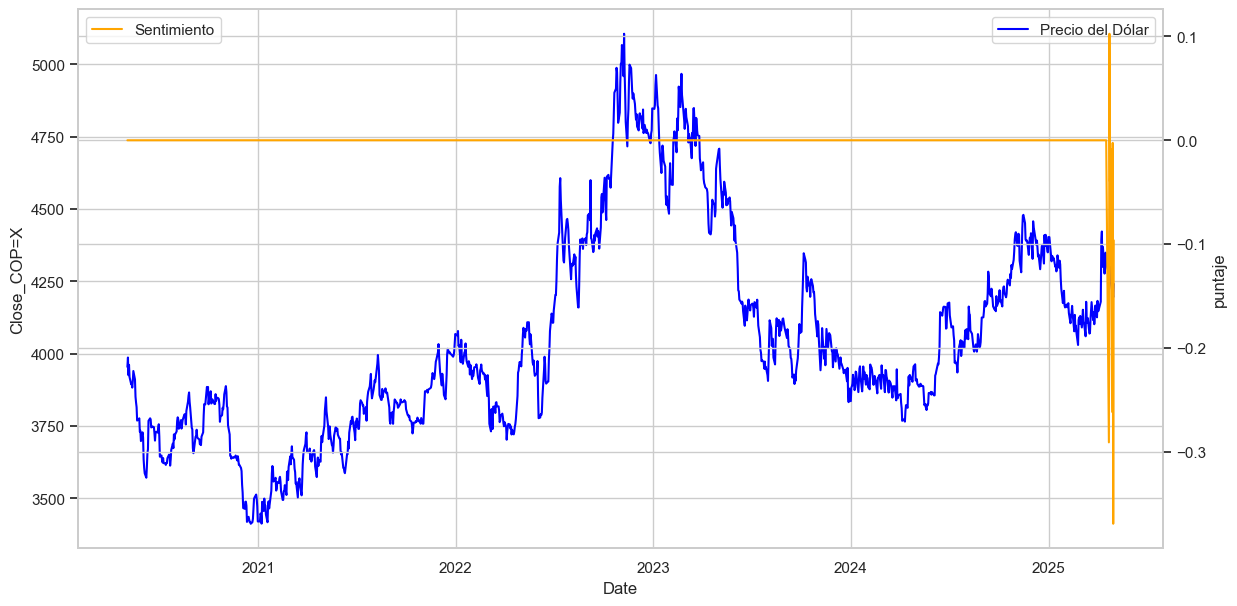

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y un eje
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=df_model, x='Date', y='Close_COP=X', label='Precio del Dólar', color='blue')
# Crear un segundo eje y
ax2 = ax.twinx()
# Graficar la segunda variable
sns.lineplot(data=df_model, x='Date', y='puntaje', label='Sentimiento', color='orange', ax=ax2)

### Graficar los ultimos 8 dias

<Axes: xlabel='Date', ylabel='puntaje'>

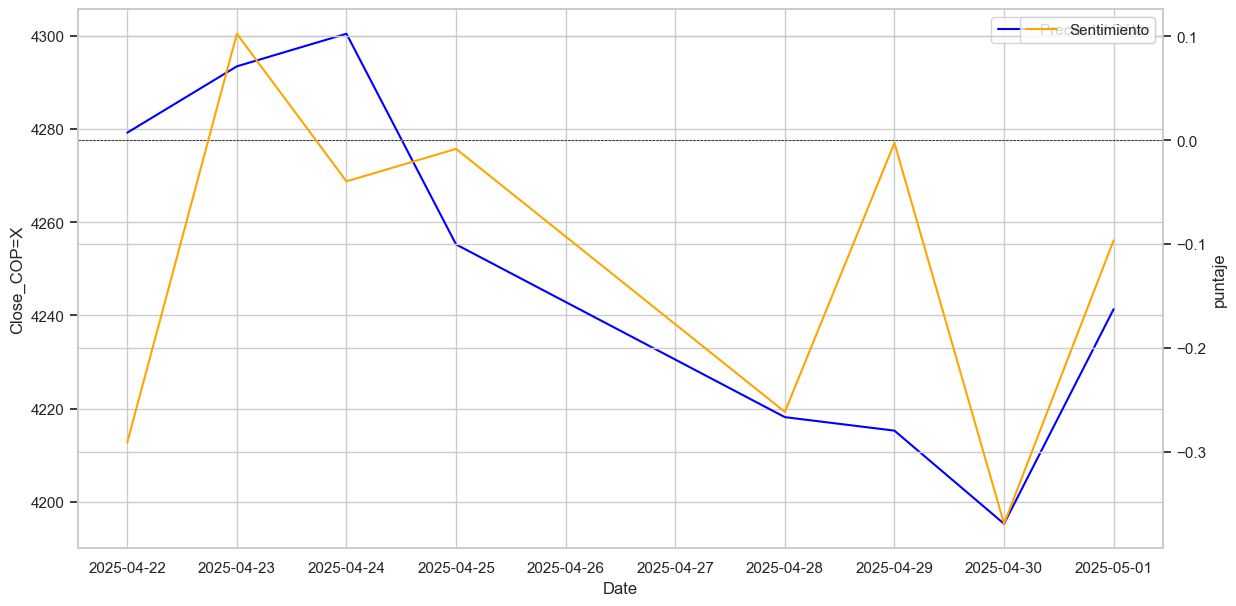

In [35]:
# Crear una figura y un eje
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=df_model.iloc[-8:], x='Date', y='Close_COP=X', label='Precio del Dólar', color='blue')
# Crear un segundo eje y
ax2 = ax.twinx()
# Crear una linea en 0
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)
# Graficar la segunda variable
sns.lineplot(data=df_model.iloc[-8:], x='Date', y='puntaje', label='Sentimiento', color='orange', ax=ax2)

# Busqueda de modelos

## Preprocesamiento de la data de los datos

In [36]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1301 non-null   datetime64[ns]
 1   Close_COP=X  1301 non-null   float64       
 2   puntaje      1301 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 30.6 KB


In [87]:
import numpy as np
# Seleccionar columnas relevantes
features = ['Close_COP=X', 'puntaje']
data = df_model[features].values

# Normalizar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Crear secuencias
def crear_secuencias(data, ventana):
    X, y = [], []
    for i in range(len(data) - ventana):
        X.append(data[i:i+ventana])
        y.append(data[i+ventana][0])  # el objetivo es 'close'
    return np.array(X), np.array(y)

ventana = 10
X, y = crear_secuencias(data, ventana)


## Division de la Data

In [88]:
# Porcentaje para entrenamiento
split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
Fechas_train, Fechas_test = df_model['Date'][:split], df_model['Date'][split:]
print("Entrenamiento:", X_train.shape, y_train.shape)
print("Prueba:", X_test.shape, y_test.shape,Fechas_train.shape, Fechas_test.shape)


Entrenamiento: (1032, 10, 2) (1032,)
Prueba: (259, 10, 2) (259,) (1032,) (269,)


## LSTM

| Parámetro   | Descripción                                                                                                                      |
| ----------- | -------------------------------------------------------------------------------------------------------------------------------- |
| `optimizer` | Algoritmo de optimización. Ej: `'adam'`, `'rmsprop'`, `'sgd'`. Puedes ajustarlo con learning rate.                               |
| `loss`      | Función de pérdida. Para regresión: `'mse'`, `'mae'`. Para clasificación: `'binary_crossentropy'`, `'categorical_crossentropy'`. |
| `metrics`   | Métricas que quieres monitorizar, como `['mae']`, `['accuracy']`.                                                                |


| Parámetro          | Descripción                                                                                           |
| ------------------ | ----------------------------------------------------------------------------------------------------- |
| `epochs`           | Número de veces que el modelo verá todo el conjunto de entrenamiento. (Ej: 100, 200...)               |
| `batch_size`       | Número de muestras por lote de entrenamiento. Valores comunes: 16, 32, 64.                            |
| `validation_split` | Usa parte del conjunto de entrenamiento como validación. Ej: `0.2` (20%). Útil si no tienes `X_test`. |
| `shuffle`          | Baraja los datos antes de cada época (por defecto `True`).                                            |
| `verbose`          | 0 = nada, 1 = barra de progreso, 2 = una línea por época.                                             |


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Salida

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Entrenamiento con parada temprana opcional
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Ajustar modelo
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2
)


c:\Users\SANTI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
17/17 - 3s - 173ms/step - loss: 14464854.0000 - mae: 3754.4561 - val_loss: 10528537.0000 - val_mae: 3240.4016
Epoch 2/200
17/17 - 0s - 12ms/step - loss: 6987814.5000 - mae: 2599.3936 - val_loss: 3324554.5000 - val_mae: 1821.4276
Epoch 3/200
17/17 - 0s - 12ms/step - loss: 1104293.2500 - mae: 870.9683 - val_loss: 155322.2969 - val_mae: 386.7340
Epoch 4/200
17/17 - 0s - 11ms/step - loss: 76000.2656 - mae: 223.2132 - val_loss: 24518.4727 - val_mae: 143.2487
Epoch 5/200
17/17 - 0s - 11ms/step - loss: 14173.4033 - mae: 94.7928 - val_loss: 6828.5928 - val_mae: 68.9772
Epoch 6/200
17/17 - 0s - 12ms/step - loss: 7860.4580 - mae: 70.4197 - val_loss: 5626.5244 - val_mae: 56.8134
Epoch 7/200
17/17 - 0s - 12ms/step - loss: 6758.2993 - mae: 62.3254 - val_loss: 4291.0396 - val_mae: 51.6786
Epoch 8/200
17/17 - 0s - 12ms/step - loss: 6510.1436 - mae: 61.1095 - val_loss: 4366.2944 - val_mae: 50.1424
Epoch 9/200
17/17 - 0s - 12ms/step - loss: 6375.3706 - mae: 60.5651 - val_loss: 4206.8042 - v

## Prediccion vs Real con test

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


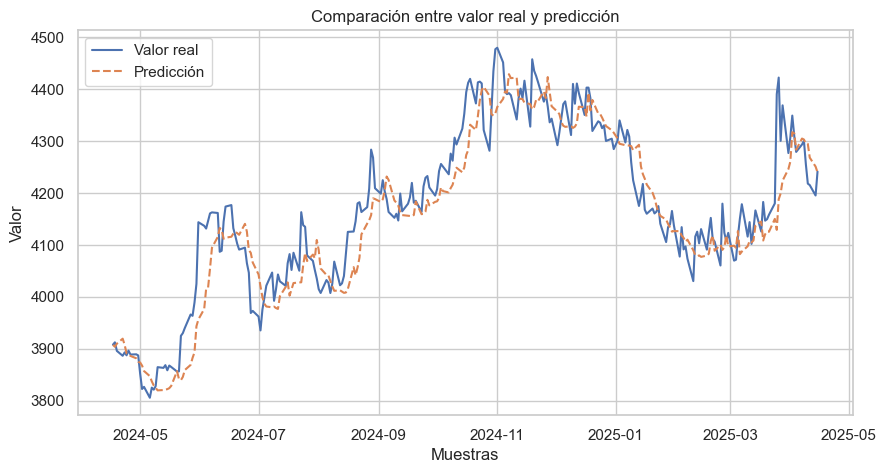

MAE: 45.3043


In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Generar predicciones
y_pred = model.predict(X_test)

# Si tus datos estaban escalados, desescala aquí (por ejemplo, con inverse_transform)

# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 5))
plt.plot(Fechas_test[:-ventana],y_test ,label='Valor real')
plt.plot(Fechas_test[:-ventana],y_pred, label='Predicción', linestyle='--')
plt.title('Comparación entre valor real y predicción')
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()
# Mostrar el MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")


### Ultimos 7 Dias

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


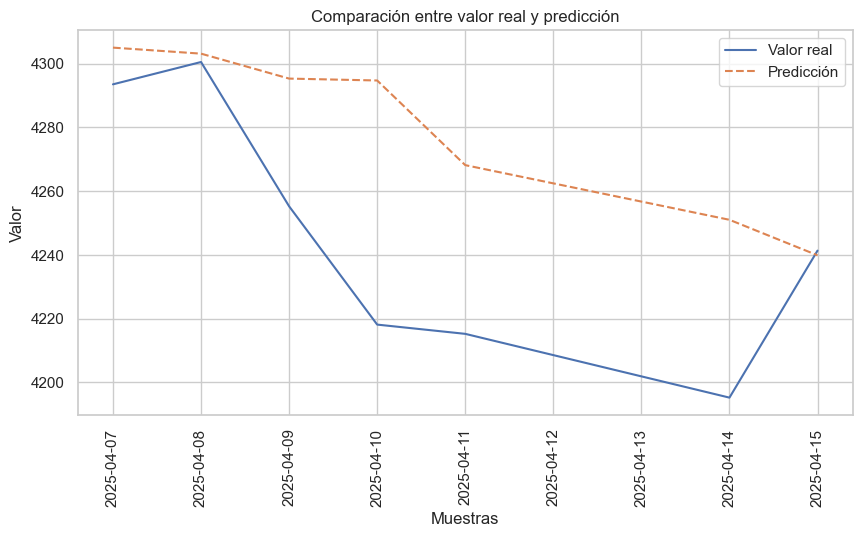

In [117]:
# Generar predicciones
y_pred = model.predict(X_test)


# Graficar los valores reales vs predichos
plt.figure(figsize=(10, 5))
plt.plot(Fechas_test[-7-ventana:-ventana],y_test[-7:] ,label='Valor real')
plt.plot(Fechas_test[-7-ventana:-ventana],y_pred[-7:], label='Predicción', linestyle='--')
plt.title('Comparación entre valor real y predicción')
plt.xlabel('Muestras')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
